In [1]:
import scipy
print(scipy.__version__)
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

1.8.1


### Ques-01

In [2]:
Max=[17,19,21,28,33,38,37,33,31,23,19,18]
Min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -32, -52, -58]

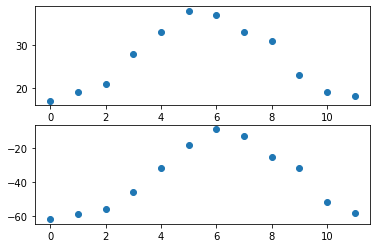

In [9]:
plt.subplot(2,1,1)
plt.plot(Max,'o')
plt.subplot(2,1,2)
plt.plot(Min,'o')


In [19]:
from scipy import signal as sg
def test_func(x,a,b):
    freq=1/12
    return a*sg.sawtooth(2*np.pi*freq*x,width=0.5)+b   ##b=offset

In [20]:
x_data=np.arange(0,12)
x_data.shape

(12,)

In [21]:
max_data=np.array(Max)
max_data.shape

(12,)

In [22]:
min_data=np.array(Min)
min_data.shape

(12,)

In [23]:
from scipy import optimize
params, params_covariance = optimize.curve_fit(test_func, x_data, max_data)
print(params)

[12.00000002 26.41666667]


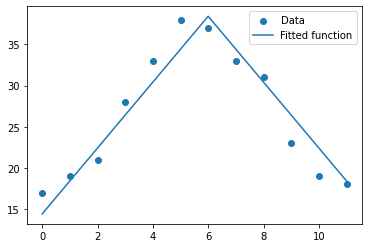

In [24]:
plt.figure(figsize = (6,4)) 
plt.scatter(x_data, max_data, label='Data') 
plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function') 
plt.legend(loc='best') 
plt.show() 

[ 30.15789469 -38.49999999]


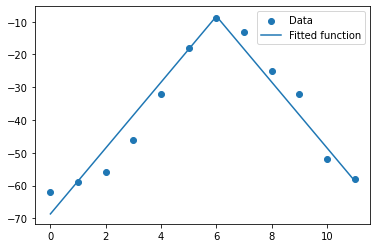

In [25]:
params, params_covariance = optimize.curve_fit(test_func, x_data, min_data)
print(params)
plt.figure(figsize = (6,4)) 
plt.scatter(x_data, min_data, label='Data') 
plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function') 
plt.legend(loc='best') 
plt.show() 

## Ques-02

In [26]:
from scipy.integrate import odeint

In [37]:
def model(y,x):
    
    dydt = y-x
    return dydt

In [38]:
# initial condition
y0 = 1

# time points
x = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,x)

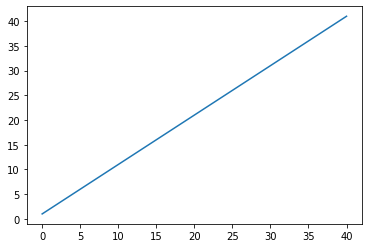

In [40]:
plt.plot(x,y)

### Ques-03

In [44]:
data=pd.read_csv(r"C:\Drive\BME 310\python\lab-07\reg.csv",header=None)
data.columns=['GNP.deflator','GNP','Unemployed','Armed.Forces','Population','Year','Employed']
data

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221
5,98.1,346.999,193.2,359.4,113.270,1952,63.639
6,99.0,365.385,187.0,354.7,115.094,1953,64.989
7,100.0,363.112,357.8,335.0,116.219,1954,63.761
8,101.2,397.469,290.4,304.8,117.388,1955,66.019
9,104.6,419.180,282.2,285.7,118.734,1956,67.857


In [46]:
population=np.array(data['Population'])
employed=np.array(data['Employed'])

Estimated value of a : 0.4848780927389055
Estimated value of b : 8.380674758772678


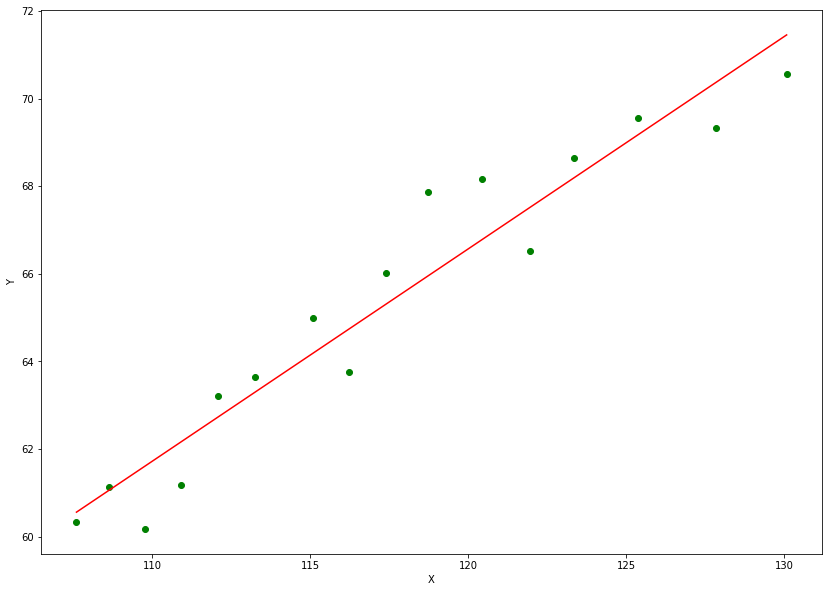

In [47]:
def function(x, a, b):
   return a*x + b
x=population
y=employed
popt,cov = scipy.optimize.curve_fit(function, x, y)
a,b= popt
y_new_value = function(x, a, b)
plt.figure(figsize = (14,10)) 
plt.scatter(x,y,color="green")
plt.plot(x,y_new_value,color="red")
plt.xlabel('X')
plt.ylabel('Y')
print("Estimated value of a : "+ str(a))
print("Estimated value of b : " + str(b))
plt.show()

In [59]:
coeffs=np.random.random([10,6])

coeffs    

array([[0.07502746, 0.48372451, 0.35713195, 0.5721279 , 0.10800818,
        0.77447172],
       [0.02150212, 0.94406779, 0.81057804, 0.28777322, 0.85394312,
        0.84957322],
       [0.34282208, 0.33204781, 0.10835911, 0.36132036, 0.04930381,
        0.14009849],
       [0.1255251 , 0.00720581, 0.4986977 , 0.89342401, 0.57345412,
        0.09307583],
       [0.75150501, 0.32688801, 0.13724534, 0.92308437, 0.01356207,
        0.1037708 ],
       [0.80763432, 0.57517827, 0.75269923, 0.35326922, 0.03917314,
        0.97960211],
       [0.10236641, 0.47310923, 0.8764863 , 0.42534276, 0.68686596,
        0.96206515],
       [0.26466132, 0.18241922, 0.29506417, 0.24044595, 0.61505646,
        0.33048028],
       [0.33377675, 0.81441053, 0.79972868, 0.56764486, 0.91552977,
        0.03985879],
       [0.53401688, 0.9003258 , 0.53512604, 0.79771151, 0.23891312,
        0.0624863 ]])

In [55]:
def poly5(x,c):
    return c[0]+c[1]*x+c[2]*x**2+c[3]*x**3+c[4]*x**4+c[5]*x**5
    
from scipy import integrate    

In [60]:
for i in range(0,10):
    print(i)
    c=list(coeffs[i,:])
    x5 = lambda x:c[0]+c[1]*x+c[2]*x**2+c[3]*x**3+c[4]*x**4+c[5]*x**5
    res,err=integrate.quad(x5, 0, 1)
    print(res)

0
0.7296459289234882
1
1.148056162290637
2
0.6685062928403162
3
0.6489200362375758
4
1.2114761064157409
5
1.6055421545436728
6
1.0351362037238465
7
0.6924284796486723
8
1.3392185476437648
9
1.420180014175184


In [61]:
for i in range(0,10):
    print(i)
    c=list(coeffs[i,:])
    x5 = lambda x:c[0]+c[1]*x+c[2]*x**2+c[3]*x**3+c[4]*x**4+c[5]*x**5
    res=scipy.optimize.minimize(x5, x0=0)
    print(res.x)

0
[-495.33390236]
1
[-1120.30496155]
2
[-340.01696014]
3
[-0.0073664]
4
[-334.73332214]
5
[-588.9825592]
6
[-0.3228236]
7
[-0.32618452]
8
[-0.49807084]
9
[-921.9336319]


In [66]:
c=list(coeffs[0,:])
x5 = lambda x:c[0]+c[1]*x+c[2]*x**2+c[3]*x**3+c[4]*x**4+c[5]*x**5
t=np.linspace(0,5,100)
x=x5(t)
from scipy import signal 
x_resampled = signal.resample(x, 25) 


In [74]:
from scipy import optimize
def poly5(x,p,q,r,s,t,u):
    return p+q*x+r*x**2+s*x**3+t*x**4+u*x**5

for i in range(0,10):
    print(i)
    c=list(coeffs[i,:])
    x5 = lambda x:c[0]+c[1]*x+c[2]*x**2+c[3]*x**3+c[4]*x**4+c[5]*x**5
    t=np.linspace(0,5,100)
    x=x5(t)
    params, params_covariance = optimize.curve_fit(poly5, t, x)
    print("Fitted 5th order polynomial Coefficients")
    print(params)
    print("Original Coefficients")
    print(c)
    


0
Fitted 5th order polynomial Coefficients
[0.07502746 0.48372451 0.35713195 0.5721279  0.10800818 0.77447172]
Original Coefficients
[0.07502746069918698, 0.48372450827145974, 0.35713194787579183, 0.5721279021528024, 0.10800817719716449, 0.7744717229140433]
1
Fitted 5th order polynomial Coefficients
[0.02150212 0.94406779 0.81057804 0.28777322 0.85394312 0.84957322]
Original Coefficients
[0.021502119337292402, 0.9440677906954804, 0.8105780446498947, 0.287773218117627, 0.8539431247479299, 0.8495732194598804]
2
Fitted 5th order polynomial Coefficients
[0.34282208 0.33204781 0.10835911 0.36132036 0.04930381 0.14009849]
Original Coefficients
[0.34282208287225, 0.33204781346827117, 0.10835911480736493, 0.36132035599514667, 0.04930380739448448, 0.14009848692275195]
3
Fitted 5th order polynomial Coefficients
[0.1255251  0.00720581 0.4986977  0.89342401 0.57345412 0.09307583]
Original Coefficients
[0.12552510151200114, 0.0072058050241482485, 0.4986976978488663, 0.8934240122731423, 0.5734541210

### Ques-05

In [75]:
x=np.linspace(-1,2,5)

In [76]:
y=x**2

In [85]:
from scipy.interpolate import interp1d
linear_interp = interp1d(x, y,kind='linear')
interp_time = np.linspace(-1,2, 50)
linear_results = linear_interp(interp_time)

In [86]:
cubic_interp = interp1d(x,y, kind = 'cubic')
cubic_results = cubic_interp(interp_time)

In [87]:
zero_interp = interp1d(x,y, kind = 'zero')
zero_results = zero_interp(interp_time)

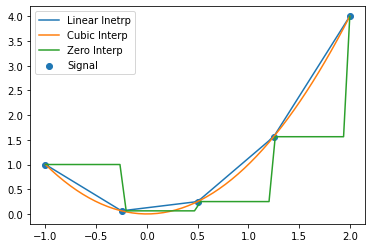

In [88]:
plt.plot(interp_time, linear_results)
plt.plot(interp_time, cubic_results)
plt.plot(interp_time, zero_results)
plt.scatter(x, y)
plt.legend(["Linear Inetrp", "Cubic Interp","Zero Interp", "Signal"])
plt.show()

### Ques-06

In [108]:
data=pd.read_csv(r"C:\Drive\BME 310\python\lab-07\nci60_data.csv",header=None,index_col=0)
data

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,,,,,,,,,,,,,,,,,,,,,
NaN,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000e+00,7.000000,8.000000,9.000000,10.000000,...,6821.000000,6822.000000,6823.000000,6824.000000,6825.000000,6826.000000,6827.000000,6828.000000,6829.000000,6830.000000
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000


In [109]:
data=data.T

In [110]:
data

,NaN,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64
1,1.0,0.300,0.679961,0.940,0.28000,0.485,0.31000,-0.83000,-0.19000,0.46000,...,0.010,-0.62000,-0.380,0.049980,0.650,-0.03000,-0.27000,0.210,-0.05000,0.35000
2,2.0,1.180,1.289961,-0.040,-0.31000,-0.465,-0.03000,0.00000,-0.87000,0.00000,...,-1.280,-0.13000,0.000,-0.720020,0.640,-0.48000,0.63000,-0.620,0.14000,-0.27000
3,3.0,0.550,0.169961,-0.170,0.68000,0.395,-0.10000,0.13000,-0.45000,1.15000,...,-0.770,0.20000,-0.060,0.419980,0.150,0.07000,-0.10000,-0.150,-0.09000,0.02000
4,4.0,1.140,0.379961,-0.040,-0.81000,0.905,-0.46000,-1.63000,0.08000,-1.40000,...,0.940,-1.41000,0.800,0.929980,-1.970,-0.70000,1.10000,-1.330,-1.26000,-1.23000
5,5.0,-0.265,0.464961,-0.605,0.62500,0.200,-0.20500,0.07500,0.00500,-0.00500,...,-0.015,1.58500,-0.115,-0.095020,-0.065,-0.19500,1.04500,0.045,0.04500,-0.71500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,6826.0,-0.030,-0.860039,-0.150,-0.30000,0.605,-0.40000,0.47000,-0.09000,-0.33000,...,-0.160,0.31000,-0.840,0.219980,0.220,-0.02000,-0.16000,0.390,-0.35000,0.48000
6827,6827.0,0.000,-1.250049,0.000,-1.15001,0.000,0.69999,0.12999,-0.70001,-0.60001,...,0.000,-1.33001,0.000,-1.100029,0.000,-1.39001,-0.02001,0.000,-0.36001,0.96999
6828,6828.0,0.280,-0.770039,-0.120,1.09000,0.745,0.29000,-0.30000,-0.54000,0.83000,...,0.150,-1.21000,-0.580,-0.520019,-0.870,-1.15000,-0.64000,0.160,-0.49000,0.29000
6829,6829.0,-0.340,-0.390039,-0.410,-0.26000,0.425,0.55000,0.57000,-0.45000,-0.03000,...,-0.530,0.30000,-0.470,-0.550019,-0.330,0.29000,-0.37000,2.030,0.01000,-0.15000


In [111]:
data.columns

Index([  nan,  'V1',  'V2',  'V3',  'V4',  'V5',  'V6',  'V7',  'V8',  'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
       'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49',
       'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59',
       'V60', 'V61', 'V62', 'V63', 'V64'],
      dtype='object', name=0)

In [112]:
data.columns=[  'nan',  'V1',  'V2',  'V3',  'V4',  'V5',  'V6',  'V7',  'V8',  'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
       'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49',
       'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59',
       'V60', 'V61', 'V62', 'V63', 'V64']

In [113]:
data

,nan,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64
1,1.0,0.300,0.679961,0.940,0.28000,0.485,0.31000,-0.83000,-0.19000,0.46000,...,0.010,-0.62000,-0.380,0.049980,0.650,-0.03000,-0.27000,0.210,-0.05000,0.35000
2,2.0,1.180,1.289961,-0.040,-0.31000,-0.465,-0.03000,0.00000,-0.87000,0.00000,...,-1.280,-0.13000,0.000,-0.720020,0.640,-0.48000,0.63000,-0.620,0.14000,-0.27000
3,3.0,0.550,0.169961,-0.170,0.68000,0.395,-0.10000,0.13000,-0.45000,1.15000,...,-0.770,0.20000,-0.060,0.419980,0.150,0.07000,-0.10000,-0.150,-0.09000,0.02000
4,4.0,1.140,0.379961,-0.040,-0.81000,0.905,-0.46000,-1.63000,0.08000,-1.40000,...,0.940,-1.41000,0.800,0.929980,-1.970,-0.70000,1.10000,-1.330,-1.26000,-1.23000
5,5.0,-0.265,0.464961,-0.605,0.62500,0.200,-0.20500,0.07500,0.00500,-0.00500,...,-0.015,1.58500,-0.115,-0.095020,-0.065,-0.19500,1.04500,0.045,0.04500,-0.71500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,6826.0,-0.030,-0.860039,-0.150,-0.30000,0.605,-0.40000,0.47000,-0.09000,-0.33000,...,-0.160,0.31000,-0.840,0.219980,0.220,-0.02000,-0.16000,0.390,-0.35000,0.48000
6827,6827.0,0.000,-1.250049,0.000,-1.15001,0.000,0.69999,0.12999,-0.70001,-0.60001,...,0.000,-1.33001,0.000,-1.100029,0.000,-1.39001,-0.02001,0.000,-0.36001,0.96999
6828,6828.0,0.280,-0.770039,-0.120,1.09000,0.745,0.29000,-0.30000,-0.54000,0.83000,...,0.150,-1.21000,-0.580,-0.520019,-0.870,-1.15000,-0.64000,0.160,-0.49000,0.29000
6829,6829.0,-0.340,-0.390039,-0.410,-0.26000,0.425,0.55000,0.57000,-0.45000,-0.03000,...,-0.530,0.30000,-0.470,-0.550019,-0.330,0.29000,-0.37000,2.030,0.01000,-0.15000


In [116]:
cols=data.columns
cols=cols[1:]
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64'],
      dtype='object')